In [2]:
# %load noiseless.py
from power_spectrum import *

nsims_test = 10**4
batch_size = 32

feature_description = {
    'field': tf.FixedLenFeature([2**16], tf.float32),
    "params": tf.FixedLenFeature([3], tf.float32)
}

data_path = "/global/scratch/avirukt/jia_sims.tfrecord"
buffer_size = int(1.2*batch_size*256**2*4)

def parse(example_proto):
    # Parse the input tf.Example proto using the dictionary above.
    d = tf.parse_single_example(example_proto, feature_description)
    return (tf.reshape(d["field"],(256,256)),d["params"])

def testing_input_fn(batch_size=batch_size):
    dataset = tf.data.TFRecordDataset(data_path, buffer_size=buffer_size)
    return dataset.take(nsims_test).map(parse).batch(batch_size)

def training_input_fn(shuffle_buffer=100, batch_size=batch_size):
    dataset = tf.data.TFRecordDataset(data_path, buffer_size=buffer_size)
    return dataset.skip(nsims_test).map(parse).repeat().shuffle(shuffle_buffer).batch(batch_size)


model = LFI(["field"], [r"$M_\nu$",r"$\Omega_m$",r"$\sigma_8$"], model_dir='/global/scratch/avirukt/models/noiseless_conv-9ca2e30')


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/global/scratch/avirukt/models/noiseless_conv-9ca2e30', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x2b229b862c88>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [3]:
lower = np.array([0, 0, 0.4])
upper = np.array([.7, 0.6, 1.1])
bounds = list(zip(lower,upper))

In [5]:
p = load("params.npy")
a = p[2:16]
p[16] = p[1]
p[1:15] = a

In [6]:
post = model.plot_posteriors(testing_fn=testing_input_fn,p=p,bounds=bounds)

INFO:tensorflow:Calling model_fn.


/global/home/users/avirukt/.conda/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/global/home/users/avirukt/.conda/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/global/home/users/avirukt/.conda/envs/tensorflow/lib/python3.6/site-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


INFO:tensorflow:Done calling model_fn.


/global/home/users/avirukt/.conda/envs/tensorflow/lib/python3.6/site-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
/global/home/users/avirukt/.conda/envs/tensorflow/lib/python3.6/site-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
/global/home/users/avirukt/.conda/envs/tensorflow/lib/python3.6/site-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
/global/home/users/avirukt/.conda/envs/tensorflow/lib/python3.6/site-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stackl

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/scratch/avirukt/models/noiseless_conv-9ca2e30/model.ckpt-3187
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


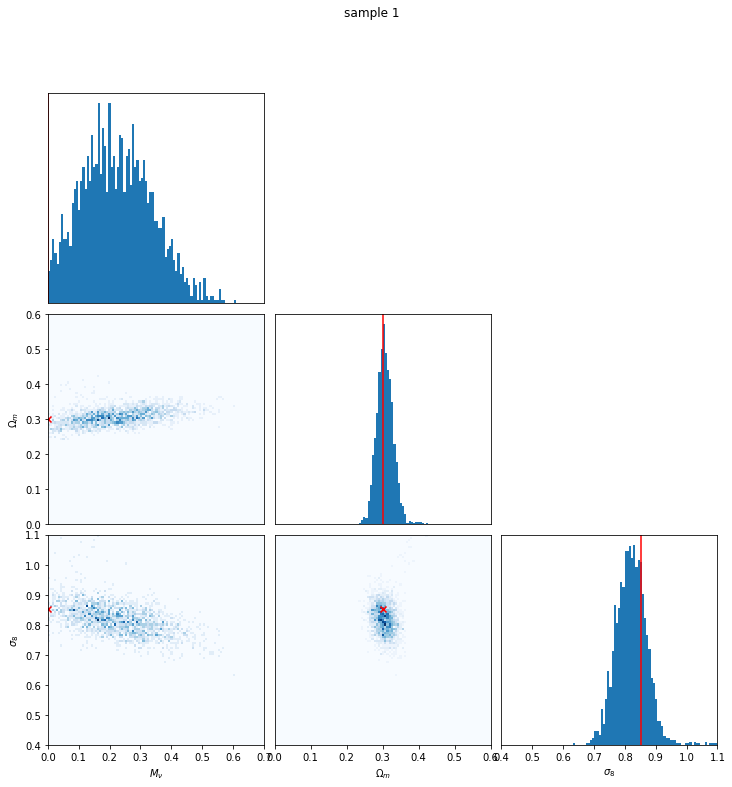

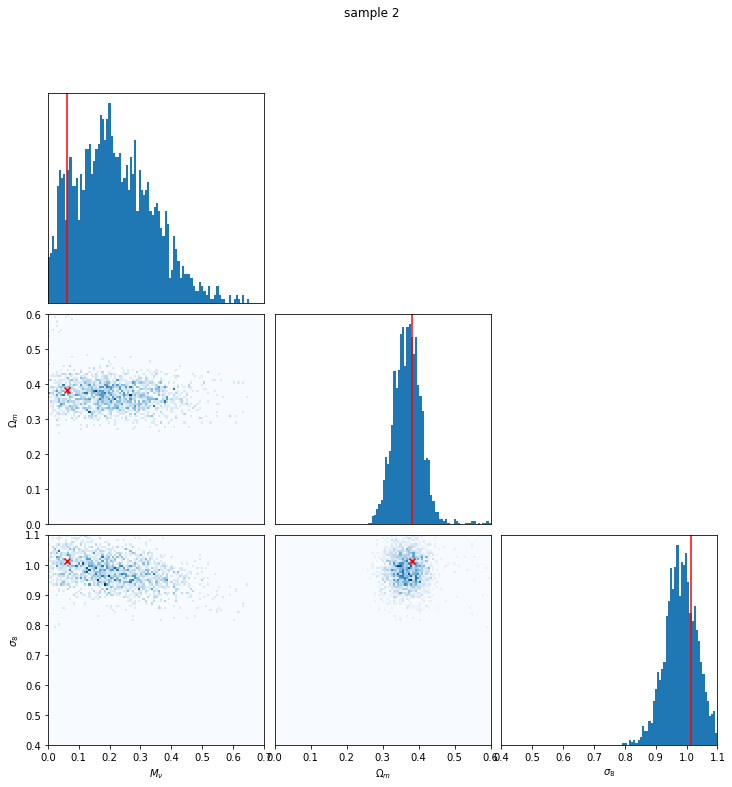

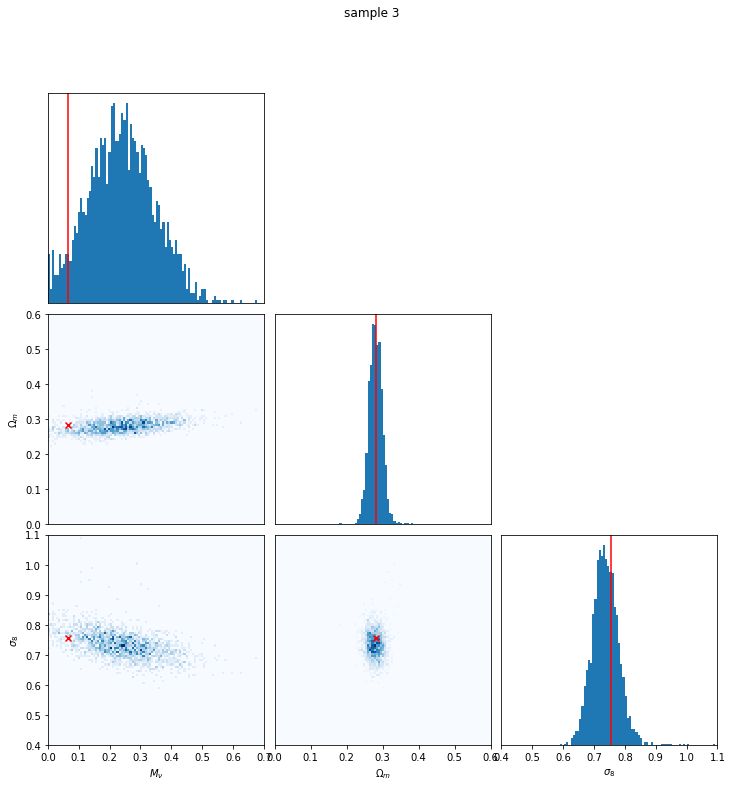

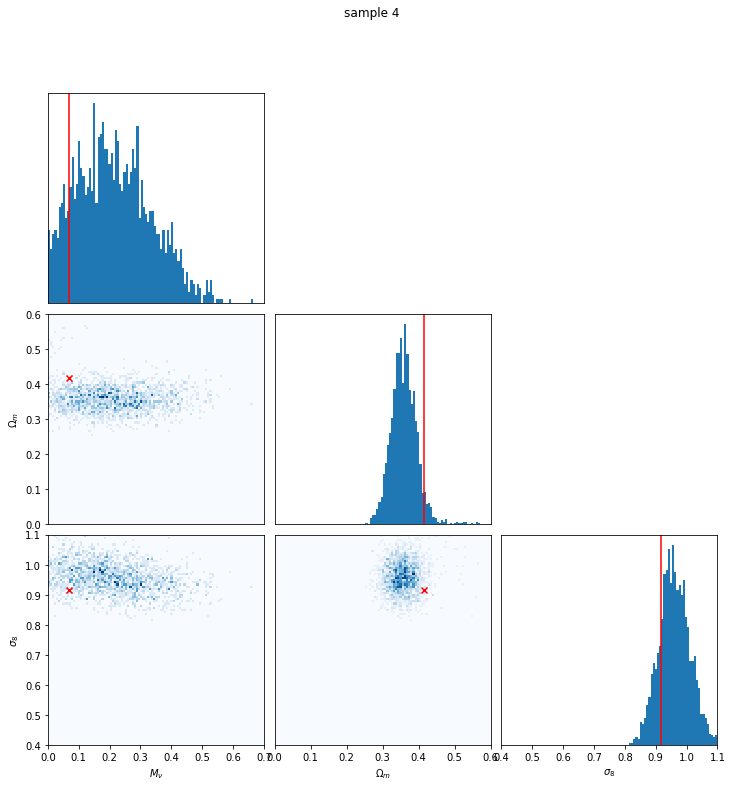

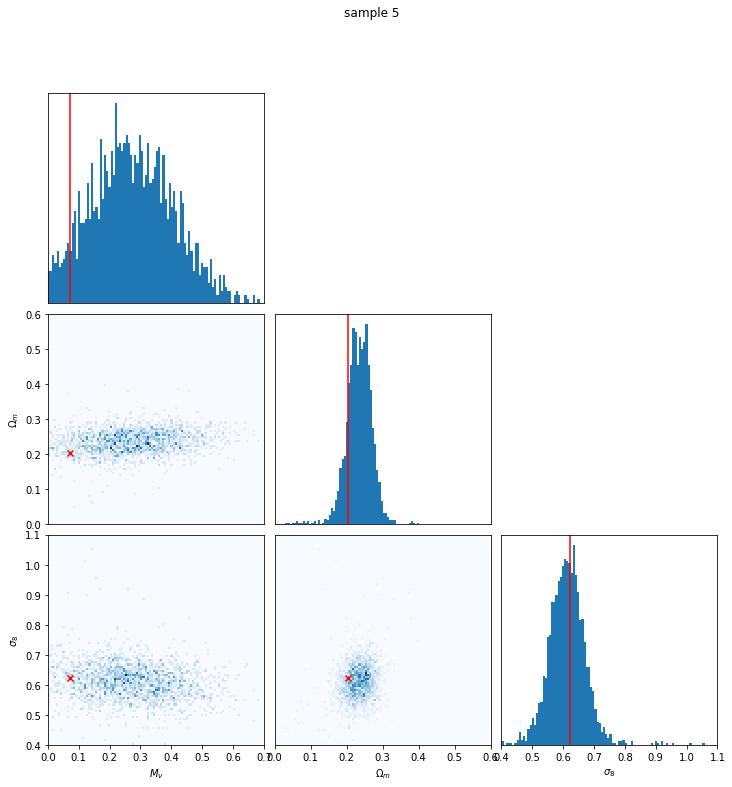

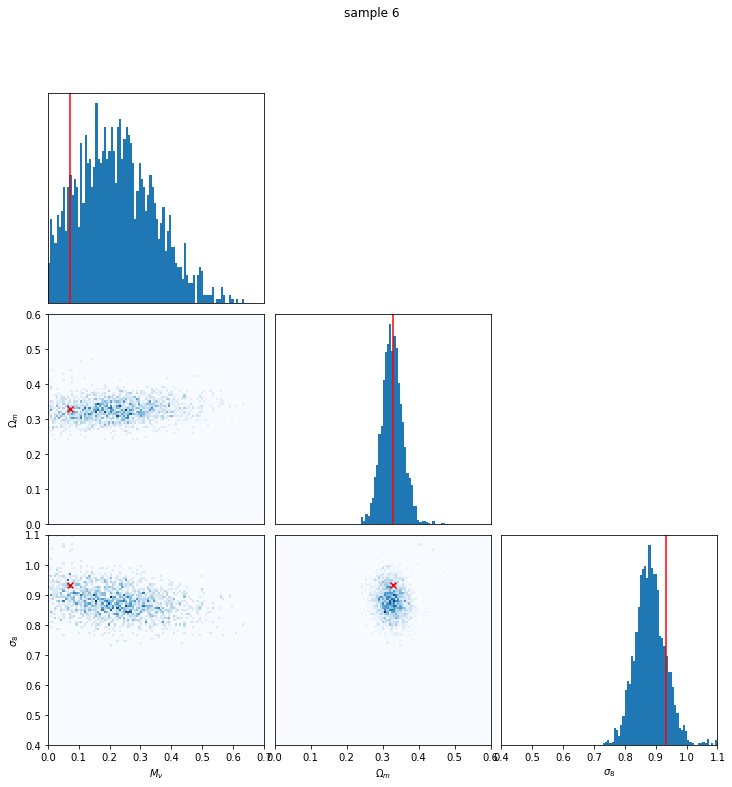

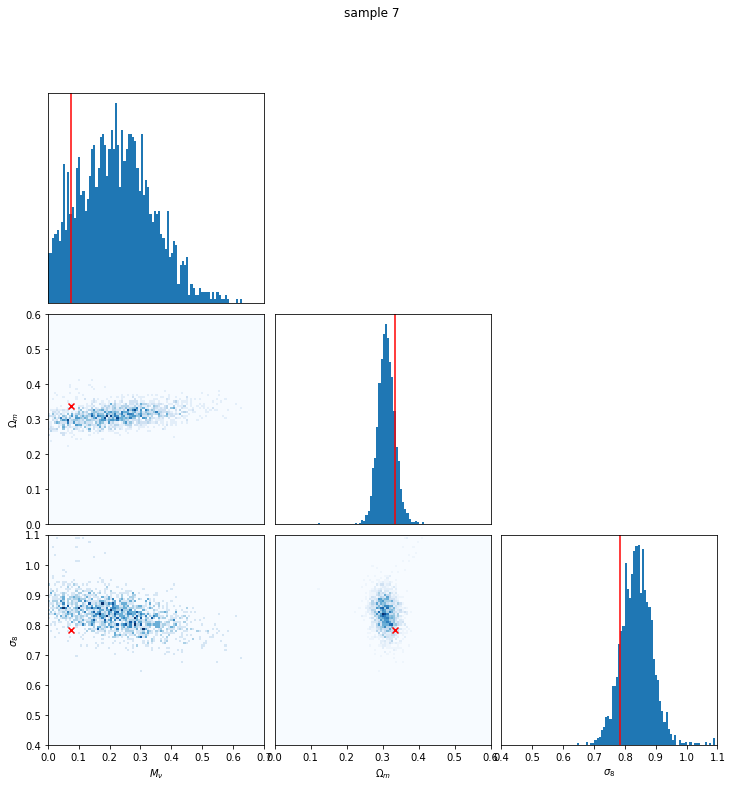

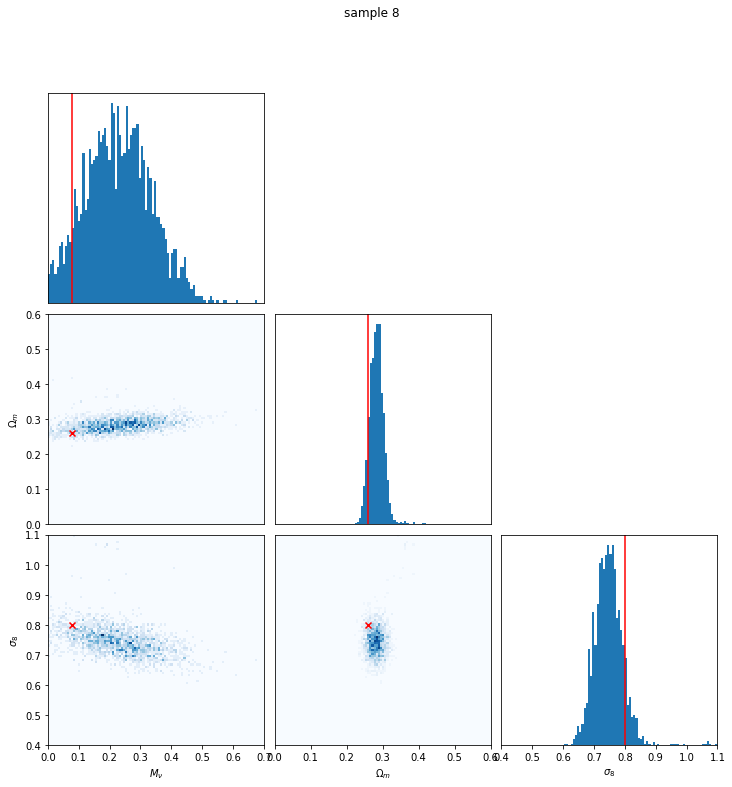

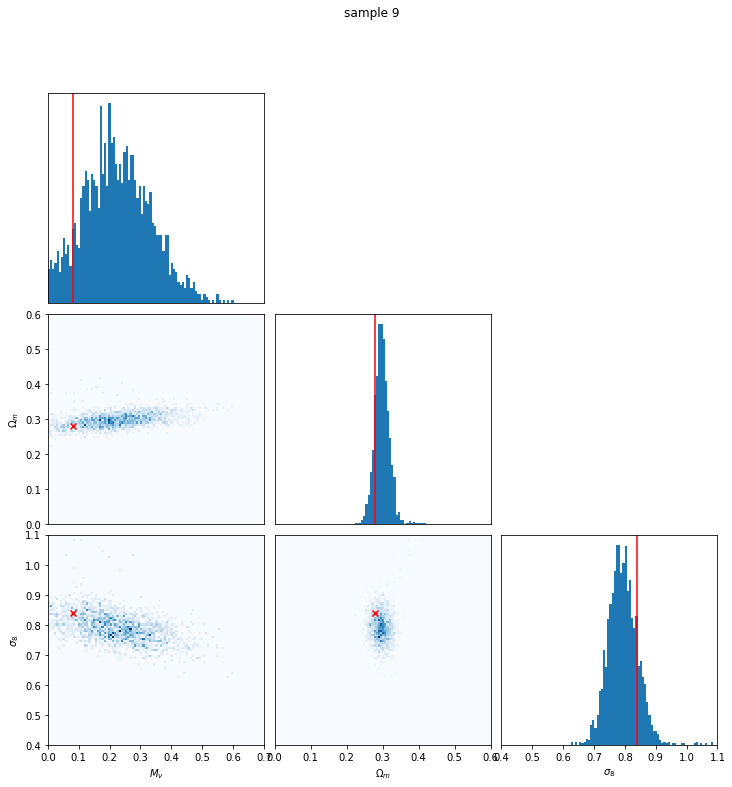

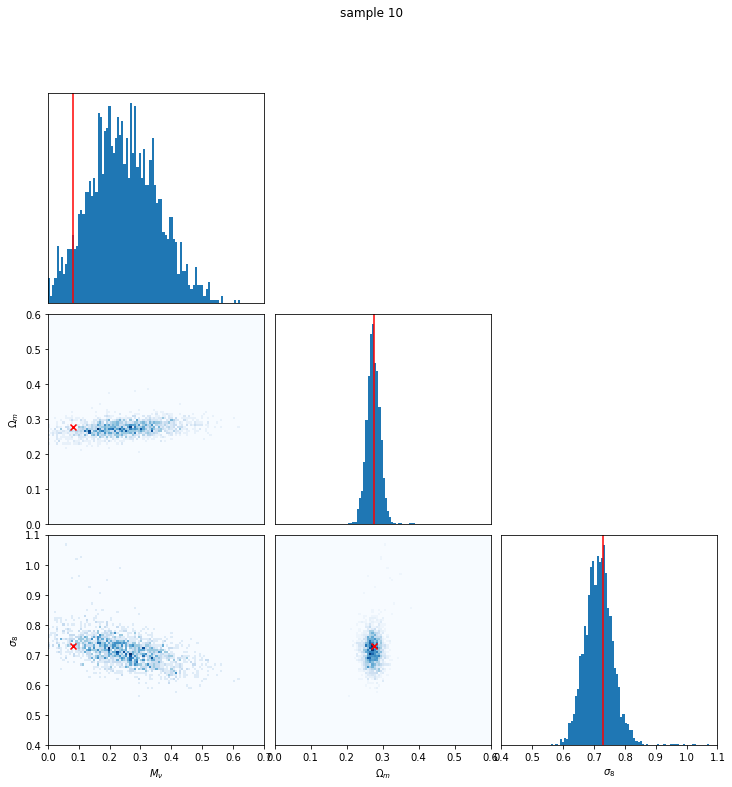

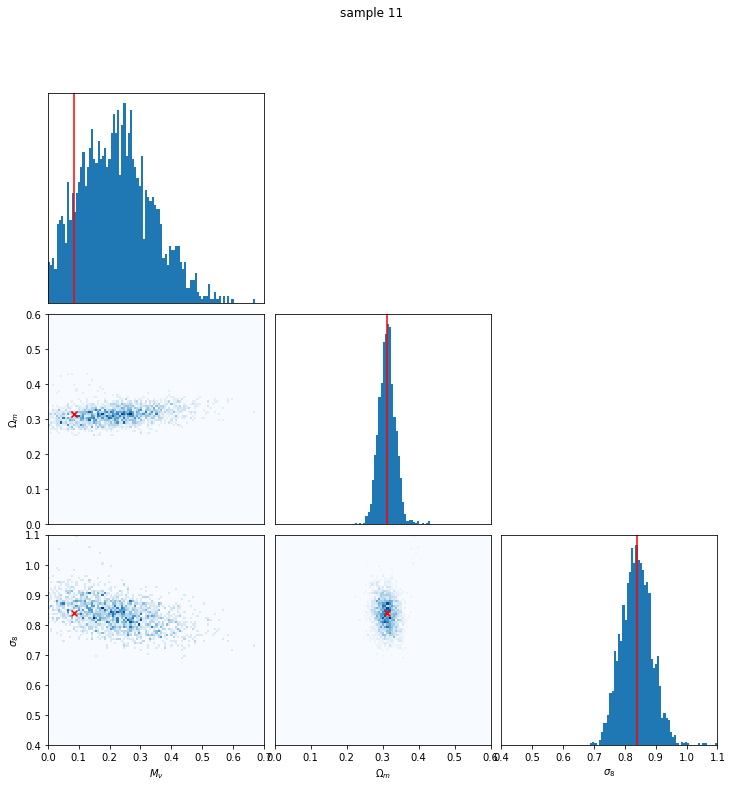

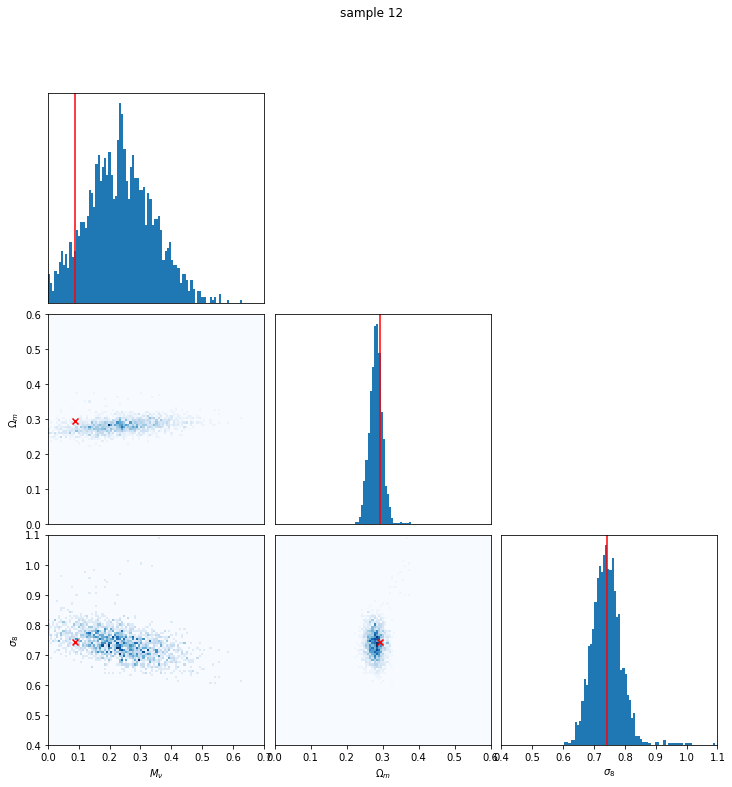

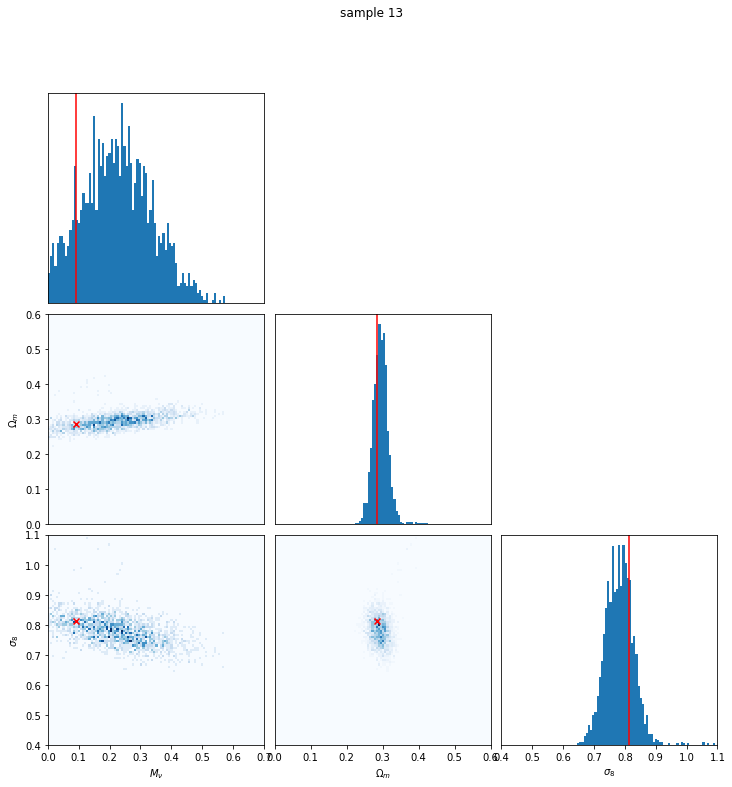

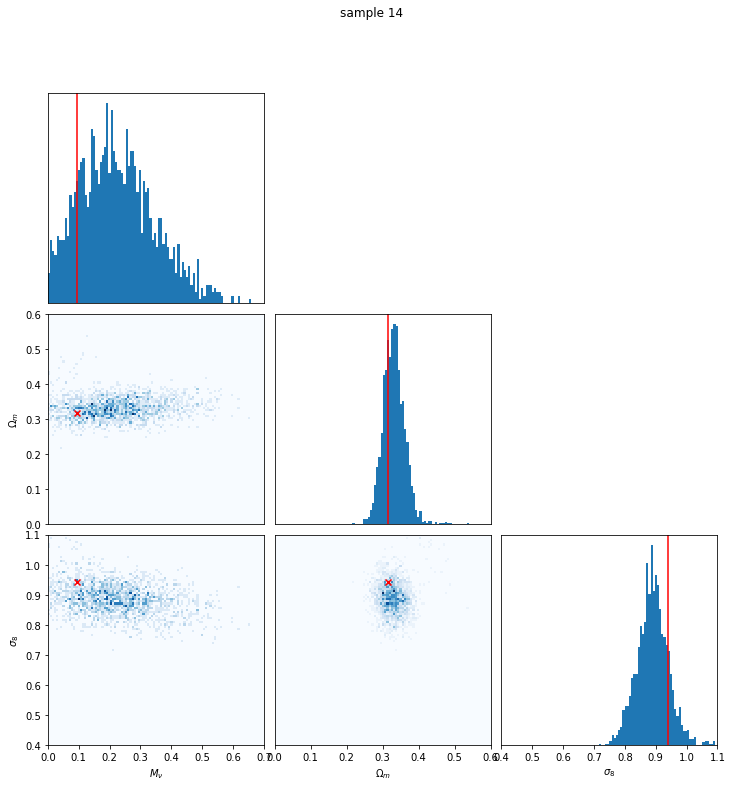

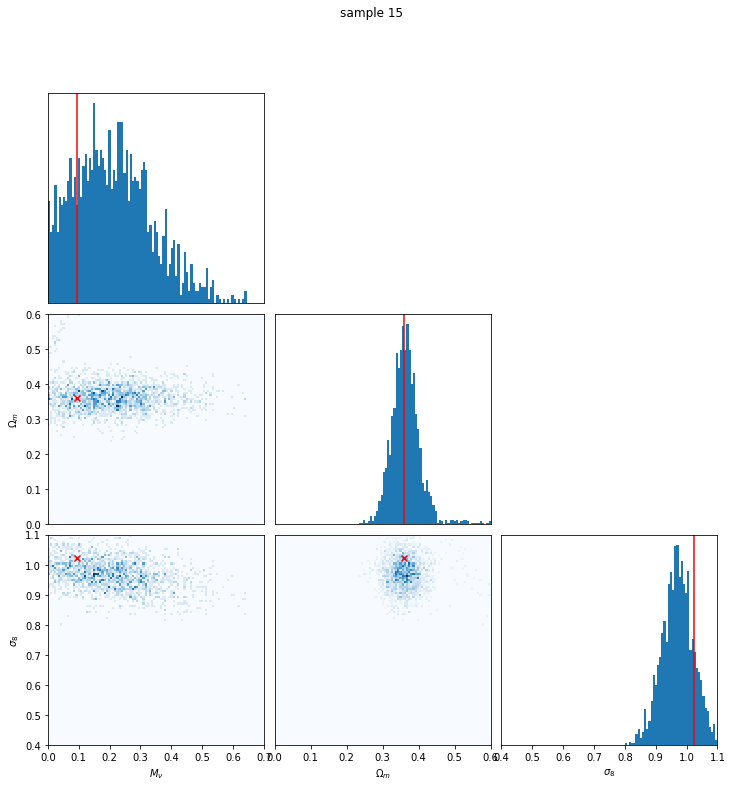

In [7]:
for i in range(15):
    next(post)